<img src="images\kidney.jpg" width="500" height="320">

## Dane

Dane zebrano na przestrzeni 2 miesięcy zaczynając w lipcu 2015 roku w Indiach. Posiadają wystarczająco informacji aby na ich bazie stworzyć model przewidujący czy pacjent ma chorobę nerek.

Dane posiadają 26 kolumn oraz 402 wierszy.

## Informacje o kolumnach:
age        -      wiek (w latach)

bp         -      ciśnienie krwi (mm/Hg)

sg         -      ciężar właściwy (1.005, 1.010, 1.015, 1.020, 1.025)

al         -      albumina (0, 1, 2, 3, 4, 5)

su         -      cukier (0, 1, 2, 3, 4, 5)

rbc        -      czerwone krwinki (normalne, nieprawidłowe)

pc         -      komórki ropy (normalne, nieprawidłowe)

pcc        -      zlepki komórek ropy (obecne, nieobecne)

ba         -      bakterie (obecne, nieobecne)

bgr        -      glukoza we krwi (mg/dl)


bu         -      mocznik we krwi (mg/dl)

sc         -      kreatynina w surowicy (mg/dl)

sod        -      sód (mEq/L)

pot        -      potas (mEq/L)

hemo       -      hemoglobina (g)

pcv        -      objętość hematokrytowa

wc         -      liczba białych krwinek (komórki/cumm)

rc         -      liczba czerwonych krwinek (miliony/cmm)

htn        -      nadciśnienie (tak, nie)

dm         -      cukrzyca (tak, nie)

cad        -      choroba wieńcowa (tak, nie)

appet      -      apetyt (dobry, słaby)

pe         -      obrzęk stóp (tak, nie)

ane        -      anemia (tak, nie)

class      -      klasa (ckd, nieckd)
 ***ckd - Przewlekła choroba nerek***



## Import bibliotek

In [33]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier

## Pobranie danych

Przy takim sposobie pobrania danych mamy możliwość usunięcie pola kolumny 'id', które jest nam zbędne - korzystamy z tej możliwości.

In [34]:
data = []
with open('data_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']

df = pd.DataFrame(data[145:], columns=names)

## Zamiana nazw kolumn na bardziej czytelne

In [35]:
# print(df)
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wbcc":"white_blood_cell_count",
          "rbcc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia",
            "class":"classification"}

df.rename(columns=cols_names, inplace=True)


In [36]:
print(df.shape)
df.head().T

(402, 26)


,0,1,2,3,4
age,48,7,62,48,51
blood_pressure,80,50,80,70,80
specific_gravity,1.020,1.020,1.010,1.005,1.010
albumin,1,4,2,4,2
sugar,0,0,3,0,0
red_blood_cells,?,?,normal,normal,normal
pus_cell,normal,normal,normal,abnormal,normal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent
blood_glucose_random,121,?,423,117,106


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      402 non-null    object
 1   blood_pressure           400 non-null    object
 2   specific_gravity         400 non-null    object
 3   albumin                  400 non-null    object
 4   sugar                    400 non-null    object
 5   red_blood_cells          400 non-null    object
 6   pus_cell                 400 non-null    object
 7   pus_cell_clumps          400 non-null    object
 8   bacteria                 400 non-null    object
 9   blood_glucose_random     400 non-null    object
 10  blood_urea               400 non-null    object
 11  serum_creatinine         400 non-null    object
 12  sodium                   400 non-null    object
 13  potassium                400 non-null    object
 14  haemoglobin              400 non-null    o

## Zamiana typu danych

Podczas ładowania pliku z danymi (.arrf) doszło do konwersji wszystkich pól na typ 'object'. Zamienimy dane które tego wymagają na float64

In [38]:
cols_to_convert = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
                   'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
                   'potassium', 'haemoglobin', 'red_blood_cell_count', 'packed_cell_volume','white_blood_cell_count']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

**Usuwamy pole które nic nie wnosi (jest zawsze '?')**

In [39]:
if 'no_name' in df.columns:
    df.drop(['no_name'], axis=1, inplace=True)

**Sprawdzamy na jakie kategorie dzielą się pola**

In [40]:
numerical_attribute = []
categorical_attribute = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_attribute.append(i)
    else:
        categorical_attribute.append(i)
print(f'numerical_attributes: {numerical_attribute}')
print(f'categorical_attributes: {categorical_attribute}')
for attribute in categorical_attribute:
    print(f'{attribute} - {df[attribute].unique()} categories\n')


numerical_attributes: ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
categorical_attributes: ['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']
specific_gravity - [1.02  1.01  1.005 1.015   nan 1.025] categories

albumin - [ 1.  4.  2.  3.  0. nan  5.] categories

sugar - [ 0.  3.  4.  1. nan  2.  5.] categories

red_blood_cells - ['?' 'normal' 'abnormal' None] categories

pus_cell - ['normal' 'abnormal' '?' None] categories

pus_cell_clumps - ['notpresent' 'present' '?' None] categories

bacteria - ['notpresent' 'present' '?' None] categories

hypertension - ['yes' 'no' '?' None] categories

diabetes_mellitus - ['yes' 'no' ' yes' '\tno' '\tyes' '?' '' None] categories

cor

**Pola takie jak 'diabetes_mellitus' oznaczone są jako mające 4 kategorie, mimo że w rzeczywistości są dwie (yes/no). Jest to spowodowane znakiem '\t' przed niektórymi wpisami; zamieniamy to na poprawny wpis.**

In [41]:


df['coronary_artery_disease'] = df['coronary_artery_disease'].replace('\tno', value='no')
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes', '':'no'})
df['classification'] = df['classification'].replace('ckd\t', value = 'ckd')
df['classification'] = df['classification'].replace('no', value = 'notckd')
df['appetite'] = df['appetite'].replace('no', value = 'poor')
df['pedal_edema'] = df['pedal_edema'].replace('no', value = 'good')

for attribute in categorical_attribute:
    print(f'{attribute} - {df[attribute].unique()} categories\n')

specific_gravity - [1.02  1.01  1.005 1.015   nan 1.025] categories

albumin - [ 1.  4.  2.  3.  0. nan  5.] categories

sugar - [ 0.  3.  4.  1. nan  2.  5.] categories

red_blood_cells - ['?' 'normal' 'abnormal' None] categories

pus_cell - ['normal' 'abnormal' '?' None] categories

pus_cell_clumps - ['notpresent' 'present' '?' None] categories

bacteria - ['notpresent' 'present' '?' None] categories

hypertension - ['yes' 'no' '?' None] categories

diabetes_mellitus - ['yes' 'no' '?' None] categories

coronary_artery_disease - ['no' 'yes' '?' None] categories

appetite - ['good' 'poor' '?' None] categories

pedal_edema - ['good' 'yes' '?' None] categories

anemia - ['no' 'yes' '?' None] categories

classification - ['ckd' 'notckd' None] categories



## Eksploracyjna analiza danych

Procent osób z CKD:  62.19 %
Procent osób bez CKD:  37.31 %


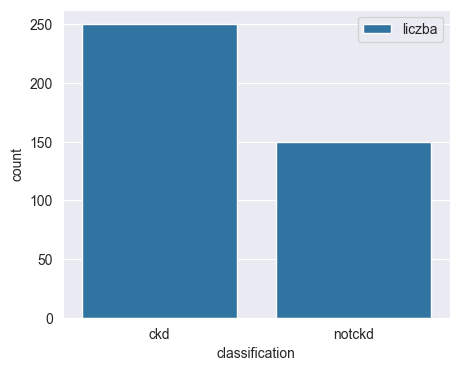

In [42]:
plt.rcParams["figure.figsize"] = (5, 4);
sns.countplot(data = df, x ='classification', label='liczba');
print('Procent osób z CKD: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Procent osób bez CKD: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

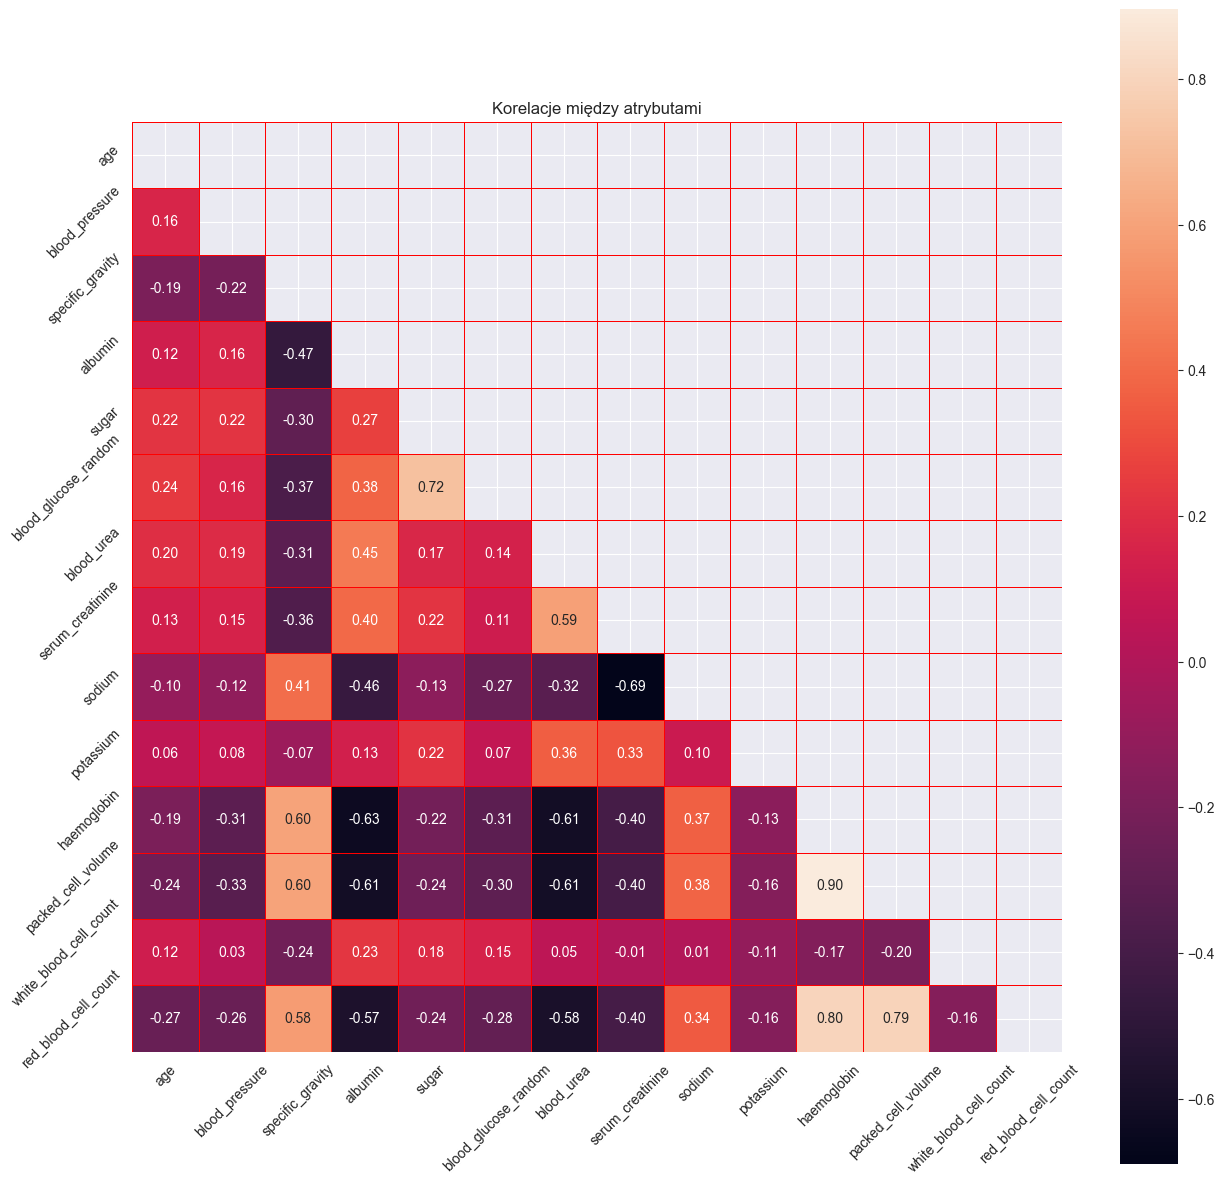

In [43]:
numeric_df = df.select_dtypes(include=[np.number])
corr_df = numeric_df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="red", mask=np.triu(corr_df), square=True)

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Korelacje między atrybutami')
plt.show()



## Dystrybucja zmiennych numerycznych

**Duża część zmiennych jest skośna, na przykaład wiek**

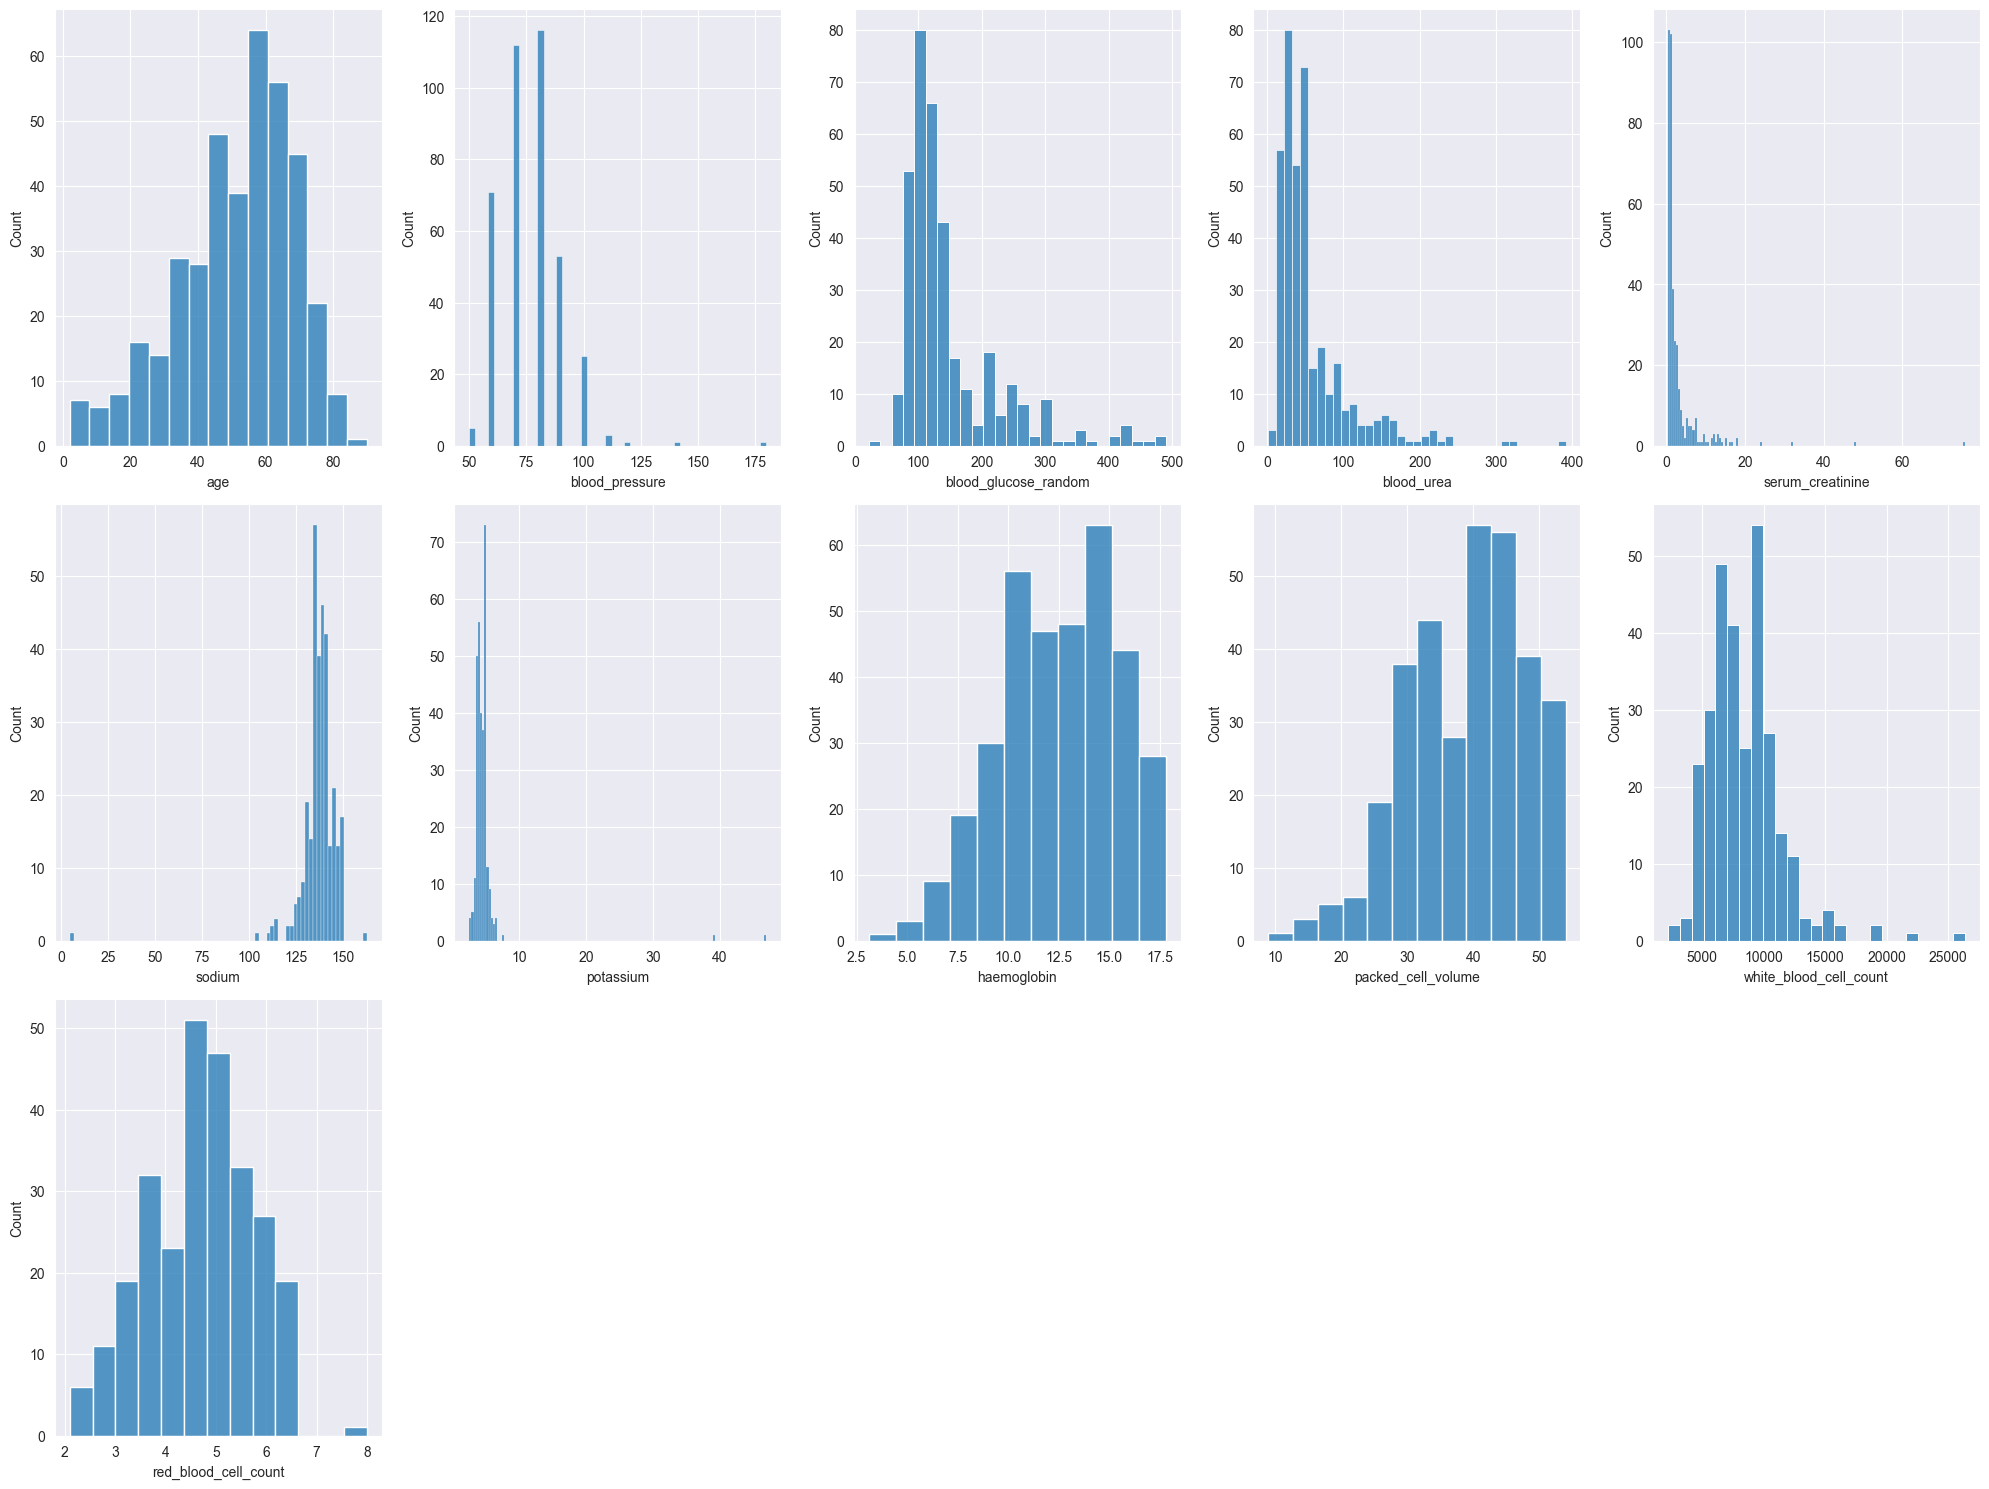

In [44]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_attribute:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Dystrybucja zmiennych kategorycznych

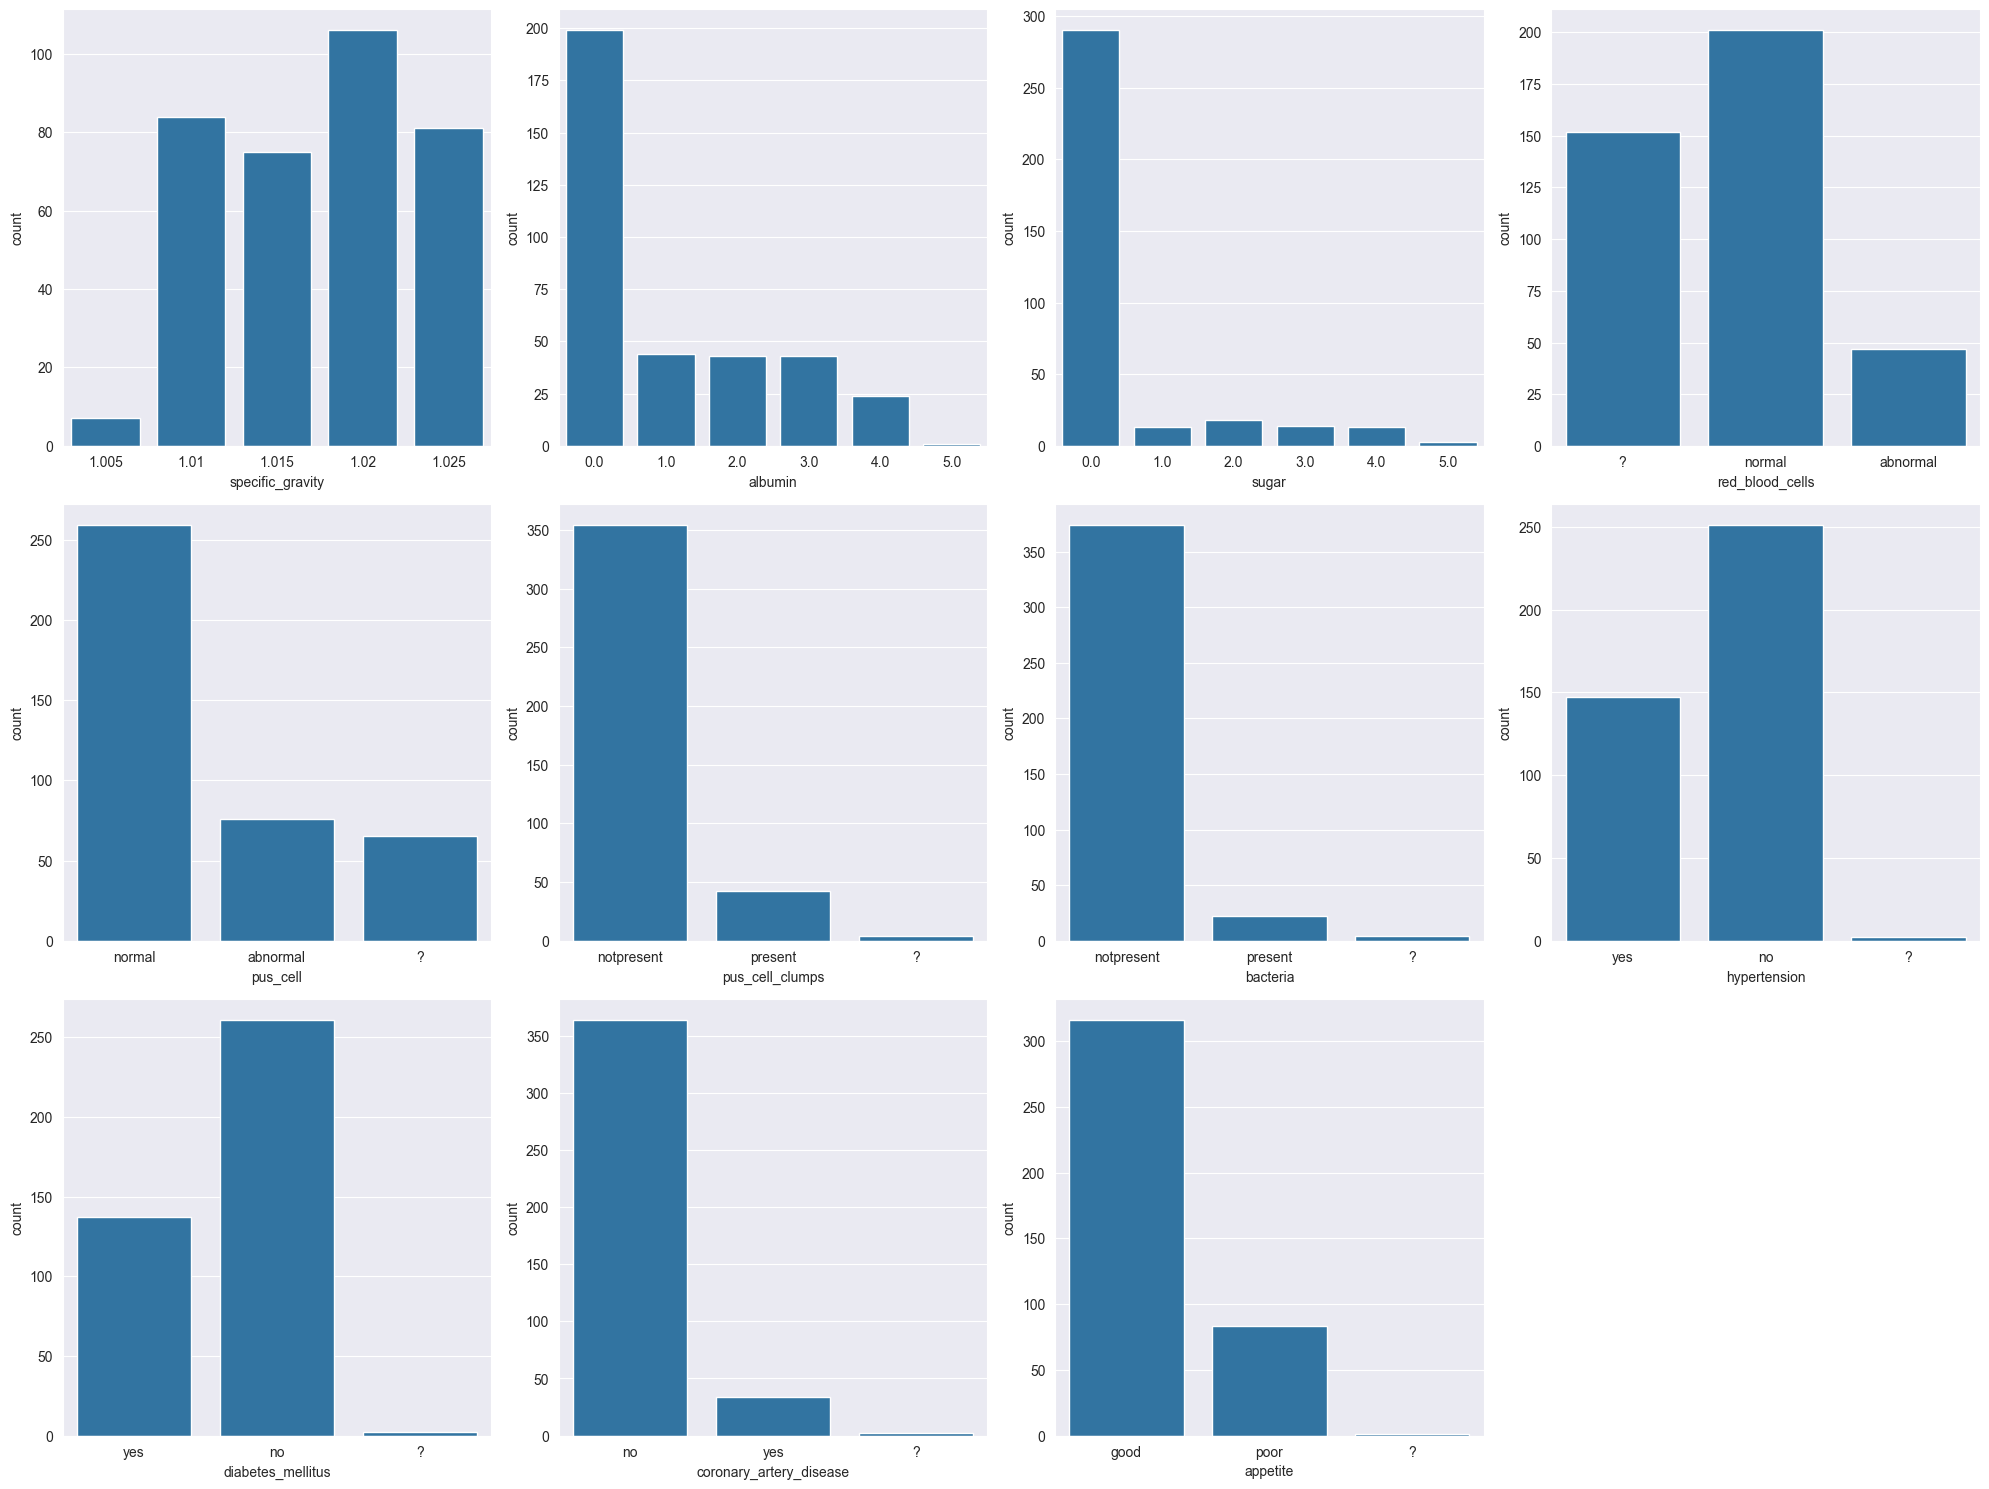

In [45]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categorical_attribute:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

## Brakujące dane

W danych można zauważyć '?' oznaczające brak danych. Powinniśmy się nimi zająć przed przejściem do tworzenia modelu.

In [46]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            154
red_blood_cell_count       133
white_blood_cell_count     108
potassium                   90
sodium                      89
packed_cell_volume          73
pus_cell                    67
haemoglobin                 54
sugar                       51
specific_gravity            49
albumin                     48
blood_glucose_random        46
blood_urea                  21
serum_creatinine            19
blood_pressure              14
age                         11
bacteria                     6
pus_cell_clumps              6
hypertension                 4
diabetes_mellitus            4
coronary_artery_disease      4
appetite                     3
pedal_edema                  3
anemia                       3
classification               2
dtype: int64

**Brakujące dane procentowo:**

<Axes: >

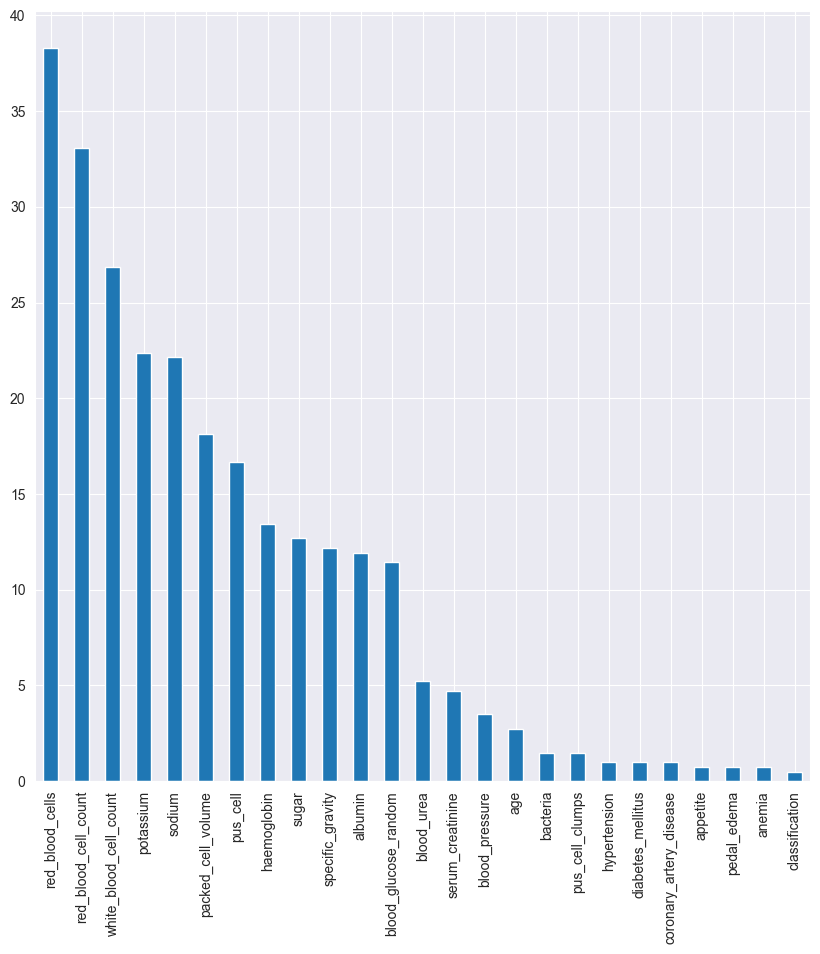

In [47]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))

**Przy usunięciu danych które zawierają nulle zostajemy z 158 wierszami.**

Tracimy w ten sposób dużo informacji, uzyjemy zatem innego spsobu.

In [48]:
df_clear_nulls = df.dropna()
print(len(df_clear_nulls))

158


In [49]:
df[numerical_attribute].isnull().sum()

age                        11
blood_pressure             14
blood_glucose_random       46
blood_urea                 21
serum_creatinine           19
sodium                     89
potassium                  90
haemoglobin                54
packed_cell_volume         73
white_blood_cell_count    108
red_blood_cell_count      133
dtype: int64

In [50]:
df[categorical_attribute].isnull().sum()

specific_gravity            49
albumin                     48
sugar                       51
red_blood_cells            154
pus_cell                    67
pus_cell_clumps              6
bacteria                     6
hypertension                 4
diabetes_mellitus            4
coronary_artery_disease      4
appetite                     3
pedal_edema                  3
anemia                       3
classification               2
dtype: int64

**Usuwamy wiersze (2) w którym target jest nullem**

In [51]:
df = df.dropna(subset=['classification'])

**Użycie KNN wydaję się być najlepszą opcją; jest ona wymagająca obliczeniowo natomiast nasza ilość danych jest relatywnie mała, zatem nie stanowi to problemu. KNN cechuje się dużą dokładnością i limituje bias, co może się zdażyć w przypadku metod jak 'random sampling'**

Przed użyciem KNN musimy zamienić dane kategoryczne na wartości binarne.

In [52]:
to_encode = [feat for feat in categorical_attribute if df[feat].dtype=='object']
for col in to_encode:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'red_blood_cells': [nan 'normal' 'abnormal']
Unique values in 'pus_cell': ['normal' 'abnormal' nan]
Unique values in 'pus_cell_clumps': ['notpresent' 'present' nan]
Unique values in 'bacteria': ['notpresent' 'present' nan]
Unique values in 'hypertension': ['yes' 'no' nan]
Unique values in 'diabetes_mellitus': ['yes' 'no' nan]
Unique values in 'coronary_artery_disease': ['no' 'yes' nan]
Unique values in 'appetite': ['good' 'poor' nan]
Unique values in 'pedal_edema': ['good' 'yes' nan]
Unique values in 'anemia': ['no' 'yes' nan]
Unique values in 'classification': ['ckd' 'notckd']


In [53]:
label_encoder = LabelEncoder()

for col in to_encode:
    df[col] = label_encoder.fit_transform(df[col].fillna('missing'))

In [54]:

df[categorical_attribute].head().T

,0,1,2,3,4
specific_gravity,1.02,1.02,1.01,1.005,1.01
albumin,1.00,4.00,2.00,4.000,2.00
sugar,0.00,0.00,3.00,0.000,0.00
red_blood_cells,1.00,1.00,2.00,2.000,2.00
pus_cell,2.00,2.00,2.00,0.000,2.00
pus_cell_clumps,1.00,1.00,1.00,2.000,1.00
bacteria,1.00,1.00,1.00,1.000,1.00
hypertension,2.00,1.00,1.00,2.000,1.00
diabetes_mellitus,2.00,1.00,2.00,1.000,1.00
coronary_artery_disease,1.00,1.00,1.00,1.000,1.00


In [55]:
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

In [56]:
df_imputed.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

## Przygotowanie do stworzenia modelu

In [57]:
X = df_imputed.drop('classification', axis=1)
y = df_imputed['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Tworzenie dwóch modeli

In [66]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print(f"Dokładność treningowa metody \'Gradient Boost\': {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Dokładność testowa metody \'Gradient Boost\': {accuracy_score(y_test, gb.predict(X_test))}\n")


print(f"Macierz pomyłek:\n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Raport klasyfikacji:\n{classification_report(y_test, gb.predict(X_test))}")

Dokładność treningowa metody 'Gradient Boost': 1.0
Dokładność testowa metody 'Gradient Boost': 0.9583333333333334

Macierz pomyłek:
[[72  0]
 [ 5 43]]

Raport klasyfikacji:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        72
         1.0       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



In [67]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)

print(f"Dokładność treningowa metody \'Extra Trees\': {accuracy_score(y_train, et.predict(X_train))}")
print(f"Dokładność testowa metody \'Extra Trees\': {accuracy_score(y_test, et.predict(X_test))}\n")


print(f"Macierz pomyłek:\n{confusion_matrix(y_test, et.predict(X_test))}\n")
print(f"Raport klasyfikacji:\n{classification_report(y_test, et.predict(X_test))}")

Dokładność treningowa metody 'Extra Trees': 1.0
Dokładność testowa metody 'Extra Trees': 0.9666666666666667

Macierz pomyłek:
[[72  0]
 [ 4 44]]

Raport klasyfikacji:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        72
         1.0       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



## Przykładowe zastosowanie modelu

In [74]:
sample_row1 = {
    "age": 55,
    "blood_pressure": 90,
    "specific_gravity": 1.020,
    "albumin": 2,
    "sugar": 1,
    "red_blood_cells": 1,
    "pus_cell": 1,
    "pus_cell_clumps": 1,
    "bacteria": 1,
    "blood_glucose_random": 120,
    "blood_urea": 45,
    "serum_creatinine": 1.5,
    "sodium": 135,
    "potassium": 4.2,
    "haemoglobin": 11.0,
    "packed_cell_volume": 38,
    "white_blood_cell_count": 8000,
    "red_blood_cell_count": 4.2,
    "hypertension": 1,
    "diabetes_mellitus": 1,
    "coronary_artery_disease": 1,
    "appetite": 2,
    "pedal_edema": 1,
    "anemia": 1
}
sample_row2 = {
    "age": 34,
    "blood_pressure": 60,
    "specific_gravity": 1.020,
    "albumin": 0,
    "sugar": 0,
    "red_blood_cells": 2,
    "pus_cell": 2,
    "pus_cell_clumps": 1,
    "bacteria": 1,
    "blood_glucose_random": 95,
    "blood_urea": 30,
    "serum_creatinine": 0.8,
    "sodium": 140,
    "potassium": 4.2,
    "haemoglobin": 13.5,
    "packed_cell_volume": 44,
    "white_blood_cell_count": 8000,
    "red_blood_cell_count": 5.6,
    "hypertension": 1,
    "diabetes_mellitus": 1,
    "coronary_artery_disease": 1,
    "appetite": 0,
    "pedal_edema": 2,
    "anemia": 1
}



random_row_df = pd.DataFrame([sample_row1], cols_names)

prediction = gb.predict(random_row_df).astype(int)
predicted_class = label_encoder.inverse_transform(prediction)
print(f"predykcja 1: {predicted_class[0]}")

random_row_df = pd.DataFrame([sample_row2], cols_names)

prediction = gb.predict(random_row_df).astype(int)
predicted_class = label_encoder.inverse_transform(prediction)
print(f"predykcja 2: {predicted_class[0]}")

predykcja 1: ckd
predykcja 2: notckd


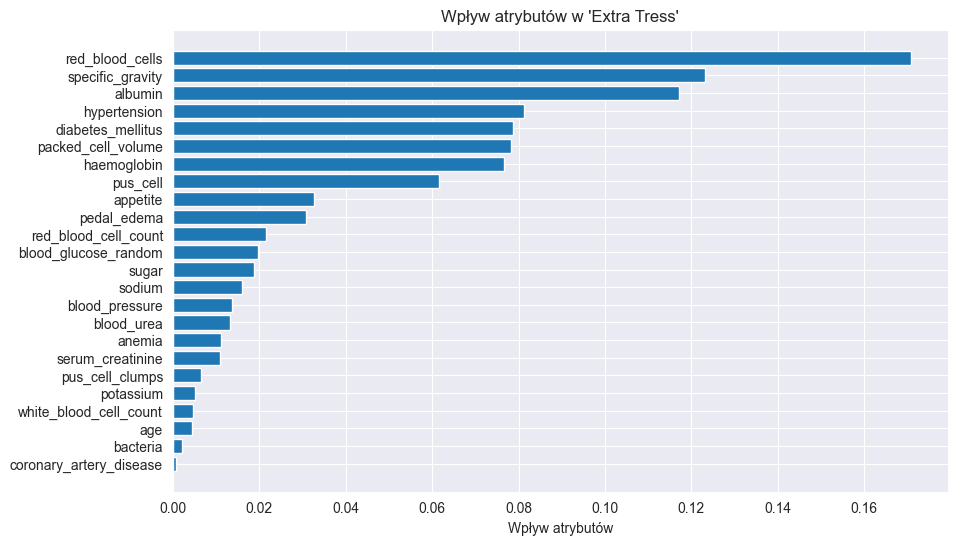

In [61]:
feature_importances = et.feature_importances_

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(df.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Wpływ atrybutów")
plt.title("Wpływ atrybutów w \'Extra Tress\'")
plt.show()

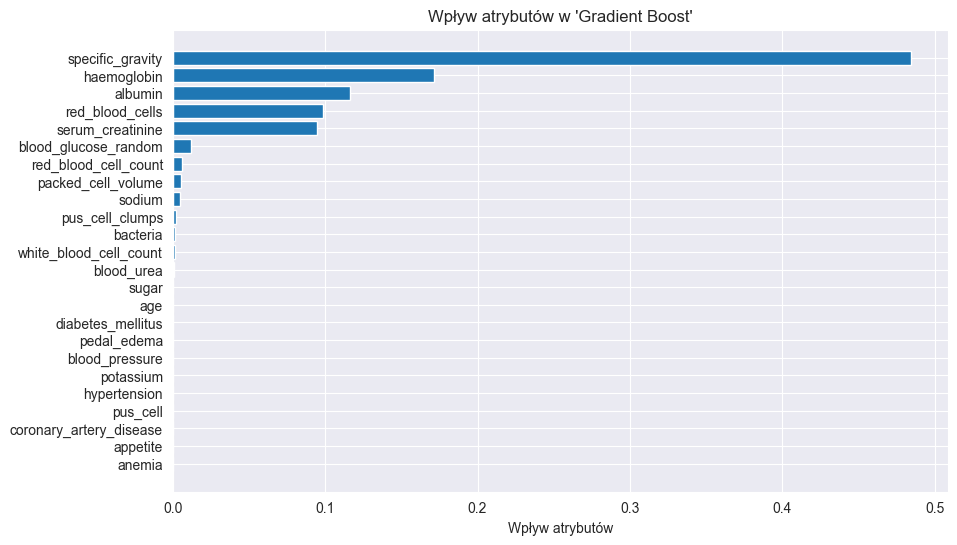

In [62]:
feature_importances_gb = gb.feature_importances_

sorted_idx_gb = feature_importances_gb.argsort()

plt.figure(figsize=(10, 6))
plt.barh(df.columns[sorted_idx_gb], feature_importances_gb[sorted_idx_gb])
plt.xlabel("Wpływ atrybutów")
plt.title("Wpływ atrybutów w \'Gradient Boost\'")
plt.show()

# Podsumowanie i wnioski

Dane nie były przygotowane w zadowalający sposób i wymagały relatywnie dłuższego przygotowania. Sam plik .arff sprawił problemy (choć warto zauważyć, że istniała możliwość zamiany go na csv). Po zmianie typu danych na prawidłowe i wypisanie kategorii można było zauważyć, że dane nie są do końca ustandaryzowane; tj. w polach kategorycznych które powinny mieć dwie opcje znajdywały się dodatkowe, co trzeba było zamienić.

Eksploracyjna analiza danych nie była zbyt rozległa, lecz można się z niej dużo dowiedzieć - osoba wykwalifikowana może zauważyć interesujące korelacje między polami. Warto dodać, że dystrubycja była często przesunięta względem rozkładu Gaussa, na przykład wiek, był on przesunięty w prawo (dominowały starsze osoby).

Po uzupełnieniu brakujących danych zostały nauczone dwa modele, Extra Trees oraz Gradient Boost. Oba wykazały się zadowalającą dokładanością; odpowiednio 96.6% i 95.8%. Modele myliły się jedynie gdy dawały rezultat który był tzw. 'false positive', zatem oceniały pacjenta jako mającego CKD, mimo że w rzeczywistości było odwrotnie.

Interesującym faktem jest sposób w jaki atrybuty wpływały na ostateczną decyzje modelu. W Extra Trees było to bardziej zbalansowane, na czele uplasowały się krwinki czerwone, a kreatynina w surowicy była dość nisko. Jest to ciekawe, ponieważ model Gradient Boost bardzo mocno polegał na kreatyninie w surowicy, w pewnym sensie ignorując dużą część parametrów. Bazując na wiedzy, że dokładność modeli była bardzo podobna można wnioskować iż Gradient Boost lepiej odnalazł cechę będącą krytyczną dla rozwoju CKD, co zgadzało by się z powszechną więdzą na temat stanu nerek.